Project Objectives:

Aim to analyze, visualize, and extract insights from 911 emergency call data to understand:

What types of emergencies are most common?

When and where do they occur most frequently?

What are people describing in their emergency calls?

Can we build a model to classify call types from text descriptions?

In [69]:
import pandas as pd

# Load the dataset
df = pd.read_csv("911.csv")

# Preview the first few rows
df.head()


lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [70]:
# Check the shape of the dataset
print("Shape:", df.shape)

# Check column info
df.info()

# Check for missing values
df.isnull().sum()


Shape: (663522, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [71]:
# Convert to datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# Confirm the change
df['timeStamp'].head()


0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [72]:
# Create a new column with just the main emergency type (e.g., EMS, FIRE, TRAFFIC)
df['Category'] = df['title'].apply(lambda x: x.split(':')[0])

# Check the most common categories
df['Category'].value_counts()


EMS        332692
Traffic    230208
Fire       100622
Name: Category, dtype: int64

In [73]:
df[['title', 'Category']].head(10)


title Category
0       EMS: BACK PAINS/INJURY      EMS
1      EMS: DIABETIC EMERGENCY      EMS
2          Fire: GAS-ODOR/LEAK     Fire
3       EMS: CARDIAC EMERGENCY      EMS
4               EMS: DIZZINESS      EMS
5             EMS: HEAD INJURY      EMS
6         EMS: NAUSEA/VOMITING      EMS
7   EMS: RESPIRATORY EMERGENCY      EMS
8        EMS: SYNCOPAL EPISODE      EMS
9  Traffic: VEHICLE ACCIDENT -  Traffic

In [74]:
df.isnull().sum()


lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
Category         0
dtype: int64

In [75]:
# Drop rows with missing zip/twp (safe only if doing location-based analysis)
df_cleaned = df.dropna(subset=['zip', 'twp'])


In [76]:
# Check the shape of the dataset
print("Shape:", df_cleaned.shape)

# Check column info
df_cleaned.info()

# Check for missing values
df_cleaned.isnull().sum()


Shape: (583199, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 583199 entries, 0 to 663521
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        583199 non-null  float64       
 1   lng        583199 non-null  float64       
 2   desc       583199 non-null  object        
 3   zip        583199 non-null  float64       
 4   title      583199 non-null  object        
 5   timeStamp  583199 non-null  datetime64[ns]
 6   twp        583199 non-null  object        
 7   addr       583199 non-null  object        
 8   e          583199 non-null  int64         
 9   Category   583199 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 48.9+ MB


lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
Category     0
dtype: int64

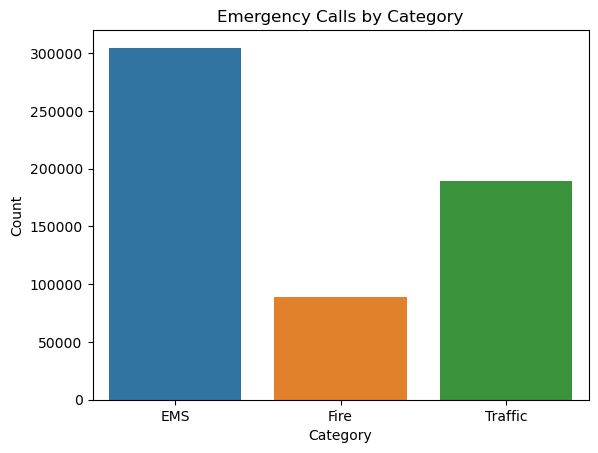

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Category', data=df_cleaned)
plt.title("Emergency Calls by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_13824\2798910385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['timeStamp'].dt.month


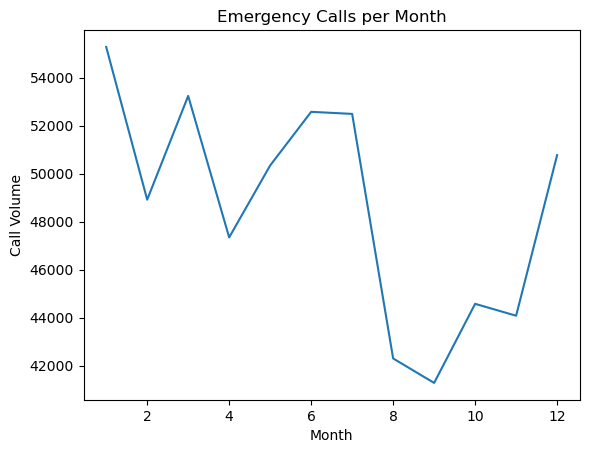

In [78]:
df_cleaned['Month'] = df_cleaned['timeStamp'].dt.month
df_cleaned.groupby('Month').count()['title'].plot()
plt.title("Emergency Calls per Month")
plt.xlabel("Month")
plt.ylabel("Call Volume")
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_13824\3753614875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DayOfWeek'] = df_cleaned['timeStamp'].dt.dayofweek
C:\Users\USER\AppData\Local\Temp\ipykernel_13824\3753614875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DayOfWeek'] = df_cleaned['DayOfWeek'].map(day_map)


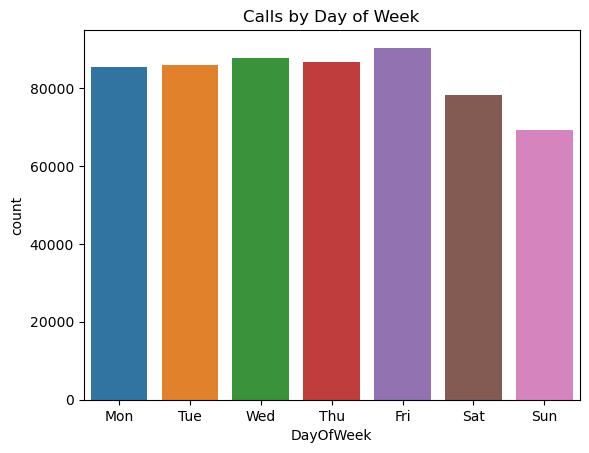

In [79]:
df_cleaned['DayOfWeek'] = df_cleaned['timeStamp'].dt.dayofweek
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df_cleaned['DayOfWeek'] = df_cleaned['DayOfWeek'].map(day_map)

sns.countplot(x='DayOfWeek', data=df_cleaned, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Calls by Day of Week")
plt.show()


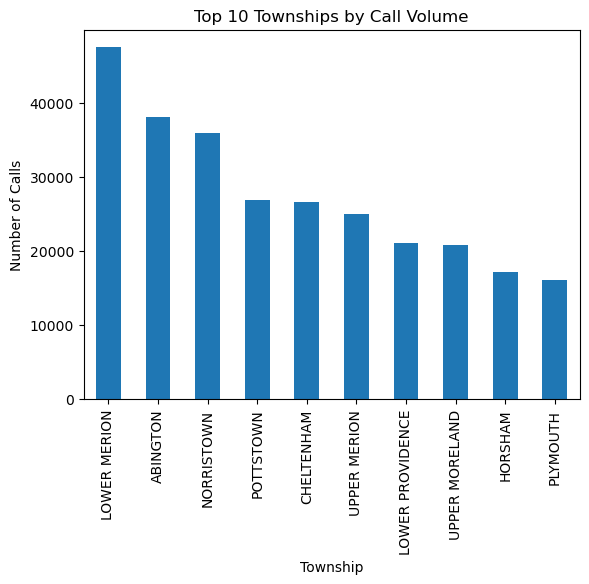

In [80]:
df_cleaned['twp'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Townships by Call Volume")
plt.xlabel("Township")
plt.ylabel("Number of Calls")
plt.show()


In [81]:
# Make a proper copy to avoid SettingWithCopyWarning
df_cleaned = df.dropna(subset=['zip', 'twp']).copy()

# Extract hour, day of week, and month
df_cleaned['Hour'] = df_cleaned['timeStamp'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['timeStamp'].dt.dayofweek
df_cleaned['Month'] = df_cleaned['timeStamp'].dt.month

# Map day numbers to names
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df_cleaned['DayOfWeek'] = df_cleaned['DayOfWeek'].map(day_map)

# Preview the cleaned dataframe
df_cleaned[['timeStamp', 'Hour', 'DayOfWeek', 'Month']].head()


timeStamp  Hour DayOfWeek  Month
0 2015-12-10 17:10:52    17       Thu     12
1 2015-12-10 17:29:21    17       Thu     12
2 2015-12-10 14:39:21    14       Thu     12
3 2015-12-10 16:47:36    16       Thu     12
5 2015-12-10 15:39:04    15       Thu     12

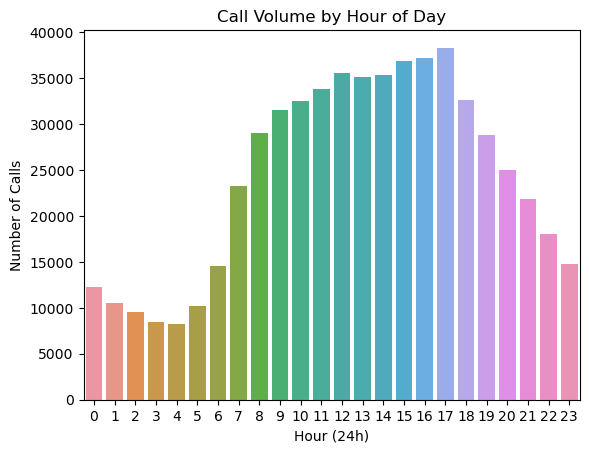

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Hour', data=df_cleaned)
plt.title("Call Volume by Hour of Day")
plt.xlabel("Hour (24h)")
plt.ylabel("Number of Calls")
plt.show()


In [83]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords') #to remove unwanted words and keep the main words like "fire" "accident"
nltk.download('wordnet') #reduce the words to their base form like "accidents->accident"

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()       # Remove non-letters
    tokens = text.split()#tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply cleaning function
df_cleaned['Cleaned_Desc'] = df_cleaned['desc'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


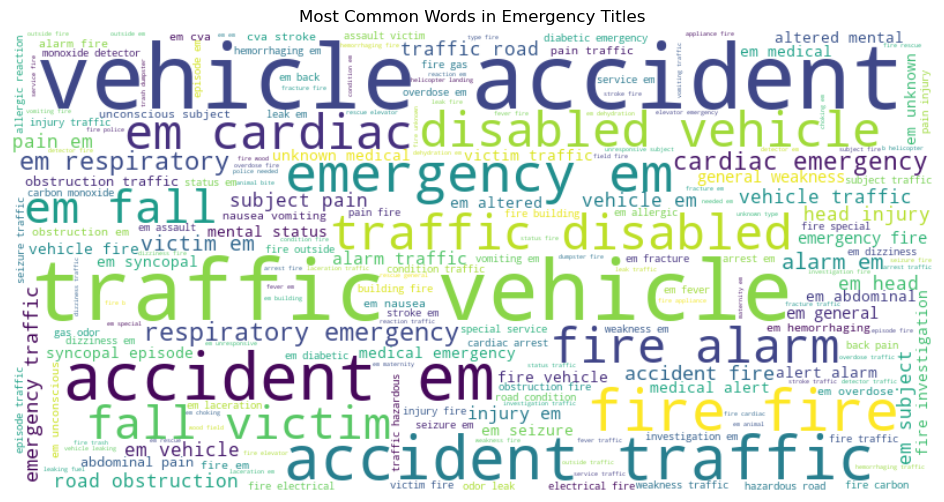

In [85]:
# Clean the title text
df_cleaned['Cleaned_Title'] = df_cleaned['title'].apply(clean_text)

# Generate word cloud from cleaned title
from wordcloud import WordCloud
text_title = " ".join(df_cleaned['Cleaned_Title'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_title)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Emergency Titles")
plt.show()


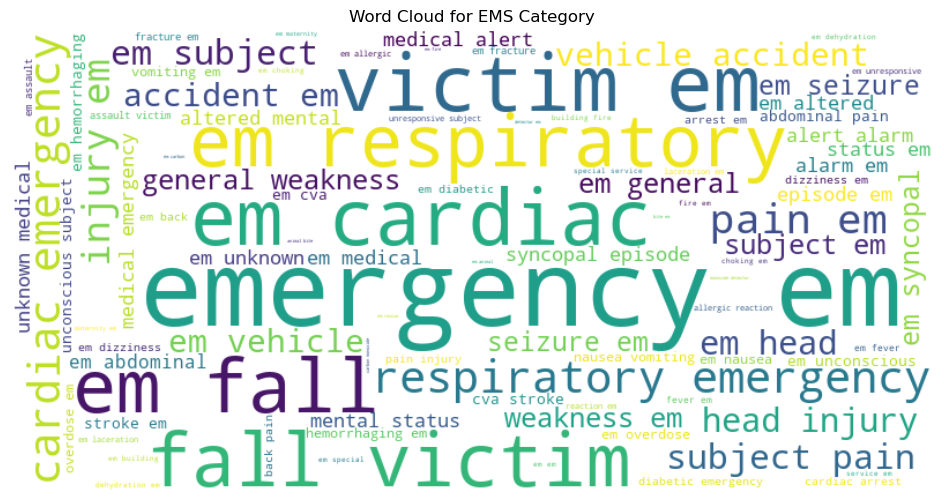

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace 'FIRE' with any category you want: 'FIRE', 'EMS', or 'TRAFFIC'
category_to_plot = 'EMS'

# Ensure the category column is consistent
df_cleaned['Category'] = df_cleaned['Category'].str.strip().str.upper()

# Clean title column if not already done
#df_cleaned['Cleaned_Title'] = df_cleaned['title'].apply(clean_text)

# Filter text by category
category_text = " ".join(df_cleaned[df_cleaned['Category'] == category_to_plot]['Cleaned_Title'])

# Generate and show word cloud
if category_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category_to_plot} Category")
    plt.show()
else:
    print(f"No words found for {category_to_plot} category. Please check the data.")


In [87]:

#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

X_text = df_cleaned['Cleaned_Title']   # input feature (cleaned titles)
y = df_cleaned['Category']             # target labels (EMS, FIRE, TRAFFIC)

# Convert text to TF-IDF features
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_text)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [88]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

         EMS       0.99      0.94      0.97     60713
        FIRE       0.96      0.89      0.92     17828
     TRAFFIC       0.89      1.00      0.94     38099

    accuracy                           0.95    116640
   macro avg       0.95      0.94      0.94    116640
weighted avg       0.95      0.95      0.95    116640



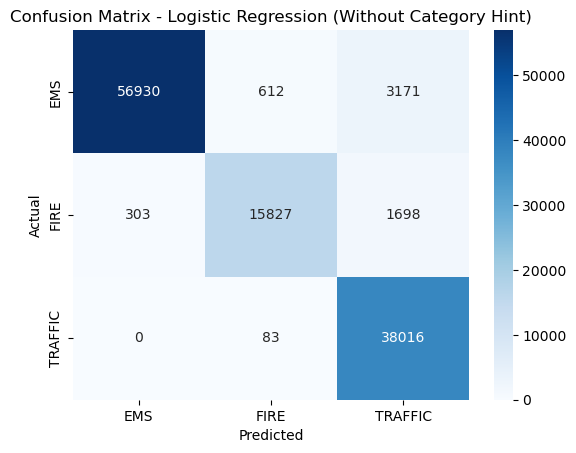

In [89]:
# 1. Remove the category prefix (e.g., "EMS:", "FIRE:") from title
df_cleaned['Stripped_Title'] = df_cleaned['title'].apply(lambda x: x.split(':')[-1].strip())

# 2. Clean the stripped title using your existing clean_text() function
df_cleaned['Cleaned_Stripped_Title'] = df_cleaned['Stripped_Title'].apply(clean_text)

# 3. TF-IDF Vectorization on cleaned, stripped titles
from sklearn.feature_extraction.text import TfidfVectorizer

X_text = df_cleaned['Cleaned_Stripped_Title']  # no category in this version
y = df_cleaned['Category']                     # target labels

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_text)

# 4. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Print metrics
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Without Category Hint)')
plt.show()


1. “What types of emergencies are most common?”
✔️ Done via df['Category'].value_counts() and bar charts (EMS, FIRE, TRAFFIC).

2. “When and where do they occur most frequently?”
✔️ Done via time-based features (Hour, DayOfWeek, Month) and township frequency plots.

3. “What are people describing in their emergency calls?”
✔️ Done through text preprocessing, cleaning, and word clouds by category.

4. “Can we build a model to classify call types from text descriptions?”
✔️ Done: You used TF-IDF + Logistic Regression, evaluated using classification report and confusion matrix.